In [2]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

In [3]:
df = pd.read_csv('datasets/train_set.csv')
test_df = pd.read_csv('datasets/test_set.csv')


X = df.loc[:, 'month':]
y = df['cpi_pct']


X_test = test_df.loc[:, X.columns]

In [9]:
model = RandomForestRegressor(n_estimators=300, max_features=0.3, max_samples=0.4, min_samples_leaf=5, n_jobs=-1)

In [10]:
model.fit(X, y)

RandomForestRegressor(max_features=0.3, max_samples=0.4, min_samples_leaf=5,
                      n_estimators=300, n_jobs=-1)

In [24]:
pred = model.predict(X_test)

In [30]:
pd.DataFrame(pred, columns=['pred']).to_csv('predictions/random_forrest.csv')

<Axes: >

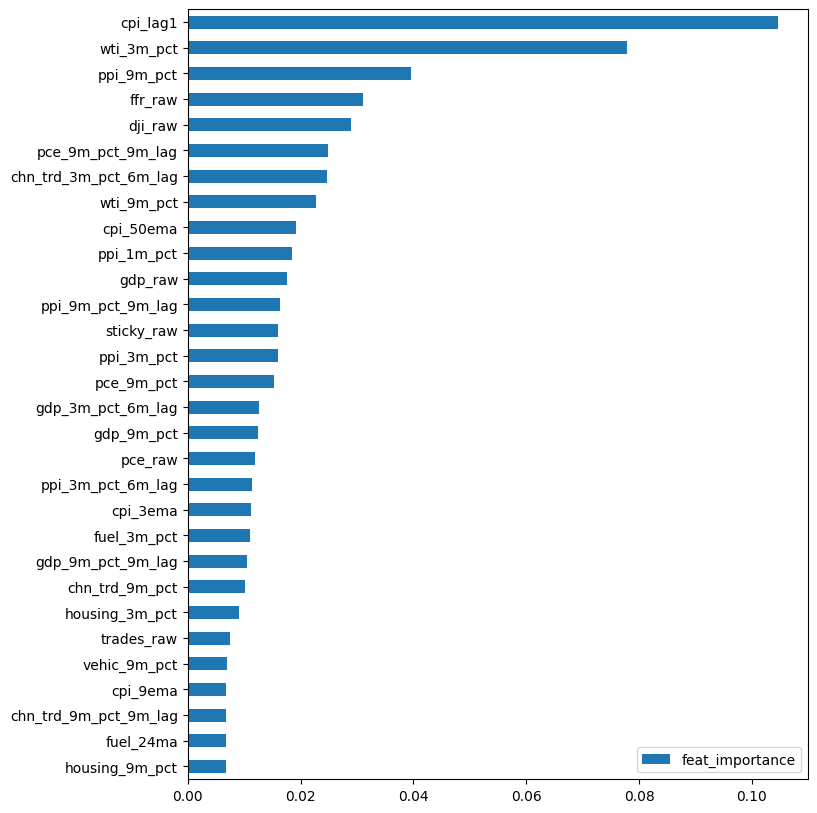

In [31]:
rf_features = pd.DataFrame(model.feature_importances_, index=model.feature_names_in_, columns=['feat_importance'])
rf_features.sort_values('feat_importance', ascending=True).iloc[-30:].plot(kind='barh', figsize=(8, 10))


In [32]:
rf_features.sort_values('feat_importance', ascending=False).to_csv('models/rf_features.csv')